Enter the latitude:49.2497
-123.1193
Enter the longitude:-123.1193
49.2497
Enter the altitude:70
70


<AxesSubplot:xlabel='time'>

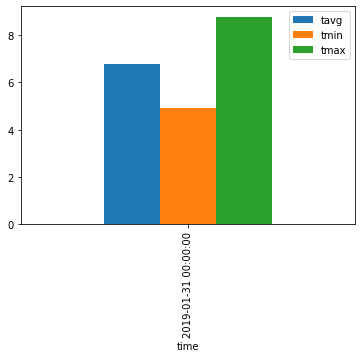

In [30]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd

# Set date
date = datetime(2019, 1, 31)

#Input Parameters to Identify Location
latitude=float(input("Enter the latitude:"))
print(latitude)
longitude=float(input("Enter the longitude:"))
print(longitude)
altitude=int(input("Enter the altitude:"))
print(altitude)
    
#Create Point for Location
location=Point(latitude, longitude, altitude)

#Get daily data
data = Daily(location, date, date)
data = data.fetch()

#Accessing data
s=data['tavg']
avg_temp=s[0]
t=data['tmin']
min_temp=t[0]
u=data['tmax']
max_temp=u[0]

#need the base temp to calculate GDD
#gdd= (max_temp+min_temp)/2 + base_temp

#Graph
data.plot(y=['tavg','tmin','tmax'], kind='bar')